In [2]:
# import all the required libaries
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import random

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [24]:

# loading datasets
dataset = pd.read_csv("./car_price.csv", index_col=0)

# top-5 rows
display(dataset.head())

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [2]:
# function to process the data
def process(row):
    temp = pd.DataFrame()
    carName = row['car_name'].split()[:2]
    temp['Car Brand'] = [carName[0]]
    temp['Car Model'] = [carName[1]]
    price = row['car_prices_in_rupee']
    if "Lakh" in price:
        price = float(price.strip("Lakh")) * 100000
    elif "Crore" in price:
        price = float(price.strip("Crore")) * 1000000
    else:
        price = float(price.replace(",", ""))
    temp['Price'] = [round(price, 2)]
    temp['KM'] = [
        round(float(row['kms_driven'].strip("kms").replace(",", "")), 2)
    ]
    temp['Engine'] = [row['engine'].strip("cc")]
    temp['Seats'] = [row['Seats'].strip('Seats')]
    temp['Fuel'] = [row['fuel_type']]
    temp['Transmission'] = [row['transmission']]
    temp['Ownership'] = [row['ownership']]
    temp['Year'] = [int(row['manufacture'])]
    return temp

In [3]:
# data preprocessing
cleanedDataDF = pd.DataFrame(columns=[
    'Car Brand', 'Car Model', 'Price', 'KM', 'Engine', 'Seats', 'Fuel',
    'Transmission', 'Ownership', 'Year'
])
for _, row in dataset.iterrows():
    cleanedData = process(row)
    cleanedDataDF = pd.concat([cleanedDataDF, cleanedData], axis=0)

In [4]:
cleanedDataDF.head()

,Car Brand,Car Model,Price,KM,Engine,Seats,Fuel,Transmission,Ownership,Year
0,Jeep,Compass,1003000.0,86226.0,1956,5,Diesel,Manual,1st Owner,2017
0,Renault,Duster,1283000.0,13248.0,1330,5,Petrol,Automatic,1st Owner,2021
0,Toyota,Camry,1640000.0,60343.0,2494,5,Petrol,Automatic,1st Owner,2016
0,Honda,Jazz,777000.0,26696.0,1199,5,Petrol,Automatic,1st Owner,2018
0,Volkswagen,Polo,515000.0,69414.0,1199,5,Petrol,Manual,1st Owner,2016


In [5]:
cleanedDataDF.shape

(5512, 10)

In [6]:
cleanedDataDF[['Engine', 'Seats', 'Year']] = cleanedDataDF[['Engine', 'Seats', 'Year']].astype(int)

In [7]:
cleanedDataDF.describe()

,Price,KM,Engine,Seats,Year
count,5.512000e+03,5512.000000,5512.000000,5512.000000,5512.000000
mean,1.025681e+06,63211.888062,1532.299710,5.250726,2015.455552
std,1.351914e+06,41844.131167,579.210876,0.720075,3.927974
min,3.500000e+04,250.000000,0.000000,2.000000,1995.000000
25%,3.150000e+05,33151.750000,1197.000000,5.000000,2013.000000
50%,5.500000e+05,59000.000000,1396.000000,5.000000,2016.000000
75%,1.025000e+06,84265.250000,1950.000000,5.000000,2018.000000
max,9.500000e+06,560000.000000,5950.000000,8.000000,2022.000000


In [1]:
1.025000e+06

1025000.0

In [8]:
cleanedDataDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 0
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car Brand     5512 non-null   object 
 1   Car Model     5512 non-null   object 
 2   Price         5512 non-null   float64
 3   KM            5512 non-null   float64
 4   Engine        5512 non-null   int64  
 5   Seats         5512 non-null   int64  
 6   Fuel          5512 non-null   object 
 7   Transmission  5512 non-null   object 
 8   Ownership     5512 non-null   object 
 9   Year          5512 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 473.7+ KB


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


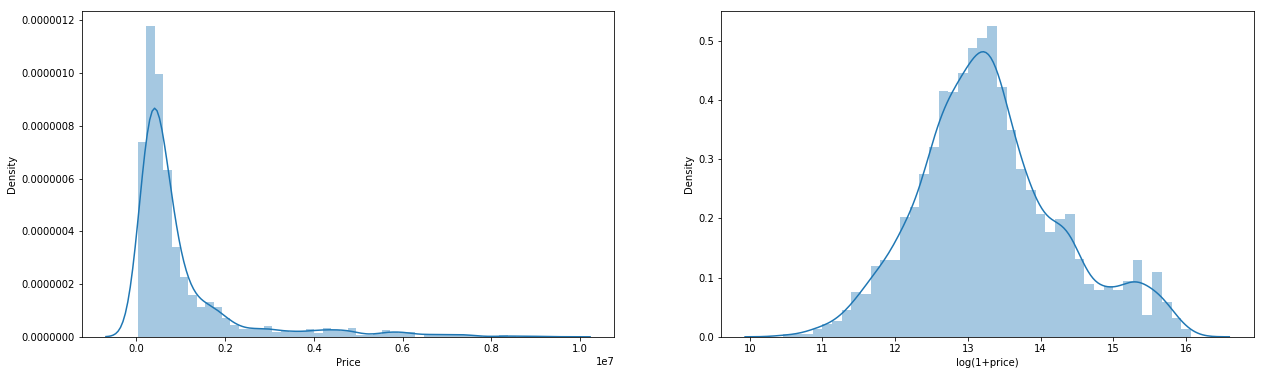

In [9]:
fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(cleanedDataDF['Price'], ax=axes[0])
sns.distplot(np.log1p(cleanedDataDF['Price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')
plt.show()

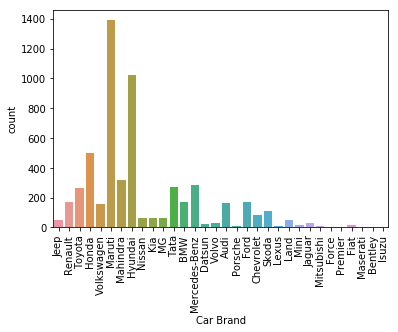

In [13]:
# car count based on manufacturer
ax = sns.countplot(data=cleanedDataDF, x=cleanedDataDF['Car Brand'])
ax.tick_params(axis='x', rotation=90)
plt.show()

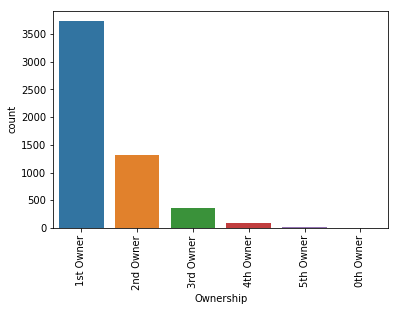

In [16]:
# car count based on ownership
ax = sns.countplot(data=cleanedDataDF, x=cleanedDataDF['Ownership'])
ax.tick_params(axis='x', rotation=90)
plt.show()

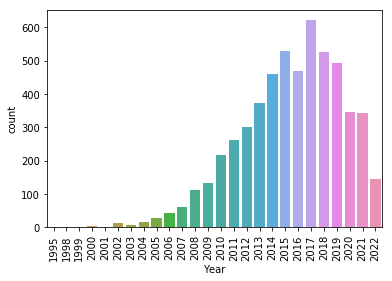

In [17]:
# car count based on year
ax = sns.countplot(data=cleanedDataDF, x=cleanedDataDF['Year'])
ax.tick_params(axis='x', rotation=90)
plt.show()

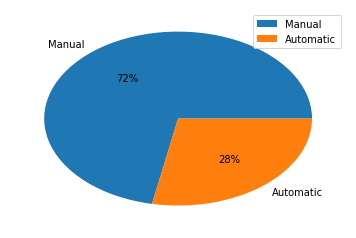

In [18]:
# distribution of cars by transmission
labels = ['Manual', 'Automatic']
plt.pie(cleanedDataDF['Transmission'].value_counts(), labels = labels, autopct='%.0f%%')
plt.legend()
plt.show()

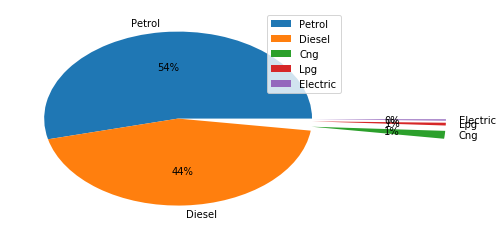

In [19]:
# distribution of cars by fuel type
labels = ['Petrol', 'Diesel', 'Cng', 'Lpg', 'Electric']
plt.pie(cleanedDataDF['Fuel'].value_counts(), labels = labels, explode=[0, 0, 1, 1, 1], autopct='%.0f%%')
plt.legend()
plt.show()

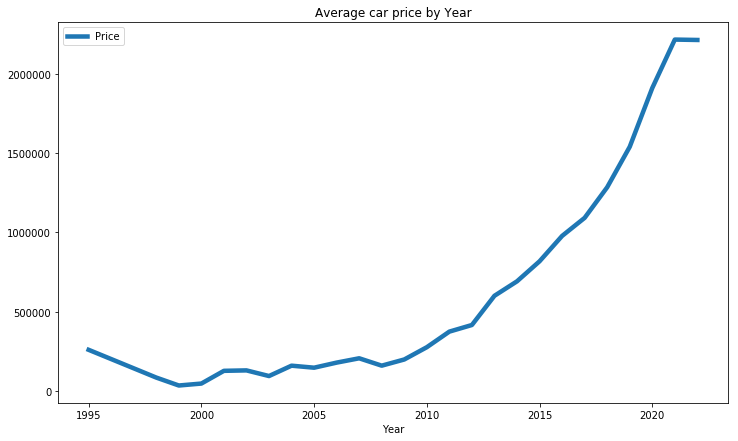

In [21]:
vis_1=pd.pivot_table(cleanedDataDF, index=['Year'],values = ['Price'],aggfunc = 'mean') 
vis_1.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by Year')
plt.show()

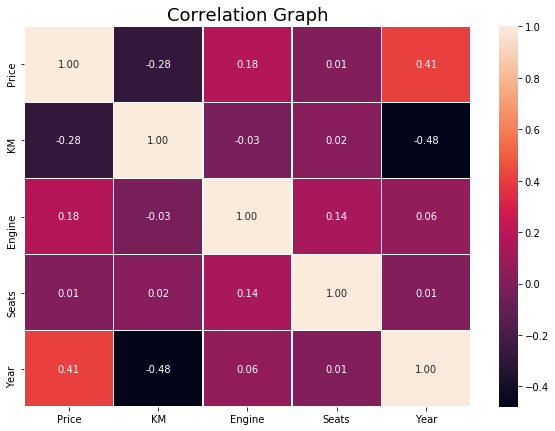

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(cleanedDataDF.corr(), annot=True,linewidths=.5,fmt='.2f')
plt.title("Correlation Graph",size=18)
plt.show()

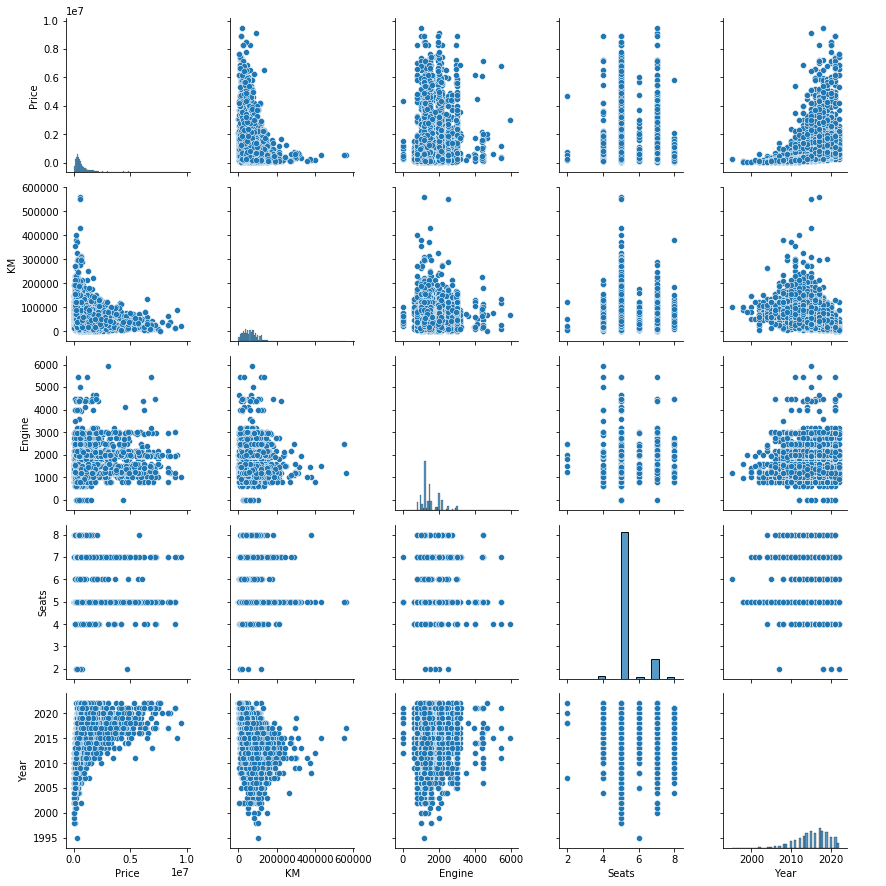

In [23]:
sns.pairplot(cleanedDataDF)
plt.show()

In [26]:
# Converting category into numerical
labelencoder = LabelEncoder()

In [35]:
cleanedDataDF["Transmission"].dtype

cleanedDataDF.loc[:, cleanedDataDF.dtypes == 'O']


,Car Brand,Car Model,Fuel,Transmission,Ownership
0,Jeep,Compass,Diesel,Manual,1st Owner
0,Renault,Duster,Petrol,Automatic,1st Owner
0,Toyota,Camry,Petrol,Automatic,1st Owner
0,Honda,Jazz,Petrol,Automatic,1st Owner
0,Volkswagen,Polo,Petrol,Manual,1st Owner
...,...,...,...,...,...
0,BMW,X1,Diesel,Automatic,1st Owner
0,BMW,M,Petrol,Automatic,2nd Owner
0,Jaguar,XF,Diesel,Automatic,2nd Owner
0,BMW,7,Diesel,Automatic,3rd Owner


In [36]:
for col in cleanedDataDF.loc[:, cleanedDataDF.dtypes == 'O'].columns:
    cleanedDataDF[col] = labelencoder.fit_transform(cleanedDataDF[col])

In [37]:
cleanedDataDF.head()

,Car Brand,Car Model,Price,KM,Engine,Seats,Fuel,Transmission,Ownership,Year
0,12,47,1003000.0,86226.0,1956,5,1,1,1,2017
0,26,54,1283000.0,13248.0,1330,5,4,0,1,2021
0,29,39,1640000.0,60343.0,2494,5,4,0,1,2016
0,8,99,777000.0,26696.0,1199,5,4,0,1,2018
0,30,138,515000.0,69414.0,1199,5,4,1,1,2016


In [41]:
# splitting dataset 
x = cleanedDataDF.drop(columns="Price")
y = cleanedDataDF.Price # np.log1p(cleanedDataDF['Price']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [42]:
print(x.shape, xtrain.shape, xtest.shape)

(5512, 9) (4409, 9) (1103, 9)


In [45]:
# defining model
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.001, max_iter=1000)

# Train model on training data
mlp.fit(xtrain, ytrain)

# Predict prices on testing data
y_pred = mlp.predict(xtest)

# Evaluate model performance
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print(f'Mean squared error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean squared error: 1499913660768.83
R-squared: 0.16


In [3]:
np.sqrt(1499913660768.83)

1224709.6230408375

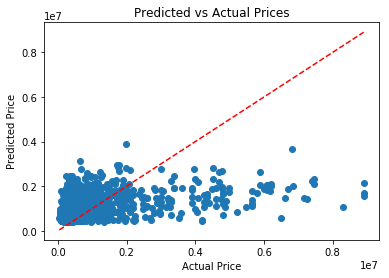

In [46]:
# Visualize predicted vs actual values
plt.scatter(ytest, y_pred)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Prices ')
plt.show()

In [47]:
cleanedDataDF.columns

Index(['Car Brand', 'Car Model', 'Price', 'KM', 'Engine', 'Seats', 'Fuel',
       'Transmission', 'Ownership', 'Year'],
      dtype='object')

In [49]:
from sklearn.neighbors import KNeighborsRegressor

# Create KNN model
knn = KNeighborsRegressor(n_neighbors=5)

# Train model on training data
knn.fit(xtrain, ytrain)

# Predict prices on testing data
ypred = knn.predict(xtest)

# Evaluate model performance
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print(f'Mean squared error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean squared error: 1523047087344.22
R-squared: 0.15


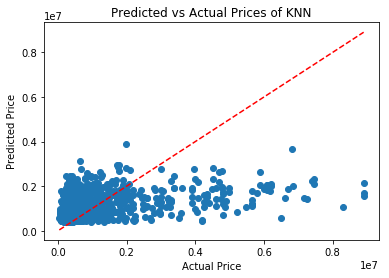

In [50]:
# Visualize predicted vs actual values
plt.scatter(ytest, y_pred)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Prices of KNN')
plt.show()